In [1]:
#Expand notebook to take full screen width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

###
import sys
sys.path.insert(0,'../../src/')

%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
import pickle
import pandas as pd
sns.reset_orig()
matplotlib.rcParams.update({'font.size': 12})
from utils_write import stack_weights, cr_calc

In [2]:
def loadfile(mean, zmean, tau, temp, mixtures, model, data_size = "full",  scaling = False, model_save_dir = "", fn="", file = "res"):
    r = 30 if file == 'ures' else 50
    exp_name = "{}_m{}_zm{}_r{}_t{}_m{}_kdT{}_{}".format(model, mean, zmean, r, tau, int(mixtures), int(temp),data_size) + fn
    if (file=='res' or file == 'ures' or file == 'gmp'):
        with open(model_save_dir + '/mnist_retrain_layer_{}_{}.p'.format(file, exp_name),'rb') as f:
            file = pickle.load(f)
    if (file=='model'):
        file = torch.load(model_save_dir + '/mnist_retrain_layer_model_{}.m'.format(exp_name))
    return file

In [147]:
n_exp = pd.DataFrame(columns = ["Layer", "tau", "act", "acc", "sp"])
idx=0
tau_list = [2e-6, 1e-6, 8e-7, 5e-7, 3e-7, 1e-7]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC1", "full", model_save_dir = "./files")
    n_exp.loc[idx] = (["FC1", tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC1", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = (["FC1", tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
tau_list = [2e-4, 1e-4, 8e-5, 5e-5, 3e-5, 1e-5]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC2", "full", model_save_dir = "./files")
    n_exp.loc[idx] = (["FC2", tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC2", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = (["FC2", tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1
    
tau_list = [2e-2, 1e-2, 8e-3, 5e-3, 3e-3, 1e-3]
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC3", "full", model_save_dir = "./files")
    n_exp.loc[idx] = (["FC3", tau, "n", res["prune_test"], res["sparsity"]])
    idx+=1
    
for tau in tau_list:
    res = loadfile(5000, 5000, tau, 1, 16, "LeNet_300_100FC3", "full", model_save_dir = "./mseha")
    n_exp.loc[idx] = (["FC3", tau, "a", res["prune_test"], res["sparsity"]])
    idx+=1

### act no act

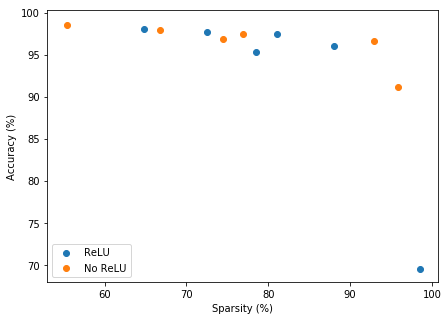

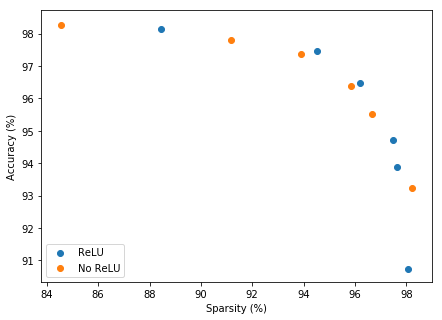

In [157]:
plt.figure(figsize=(7,5))
f = n_exp.query('act == \'a\' and Layer == \'FC1\'')
plt.scatter(f['sp'], f['acc'], label = "ReLU")
f= n_exp.query('act == \'n\' and Layer == \'FC1\'')
plt.scatter(f['sp'], f['acc'], label = "No ReLU")
plt.xlabel("Sparsity (%)")
plt.ylabel("Accuracy (%)")
plt.legend(loc=3)
plt.savefig('figs/l1act.eps', format='eps', dpi=1000, bbox_inches='tight')

plt.figure(figsize=(7,5))
f = n_exp.query('act == \'a\' and Layer == \'FC2\'')
plt.scatter(f['sp'], f['acc'], label = "ReLU")
f= n_exp.query('act == \'n\' and Layer == \'FC2\'')
plt.scatter(f['sp'], f['acc'], label = "No ReLU")
plt.xlabel("Sparsity (%)")
plt.ylabel("Accuracy (%)")
plt.legend(loc=3)
plt.savefig('figs/l2act.eps', format='eps', dpi=1000, bbox_inches='tight')

In [115]:
fin_exp = pd.DataFrame(columns = ["Layer", "tau", "acc_d", "Accuracy", "Sparsity"])
idx=0
for acc in [88.3, 95.3, 96.3, 97.3]:
    for layer in ["FC1", "FC2", "FC3"]:
        sp_df = np.round(n_exp.query("act == \'n\' and acc > {} and Layer == \'{}\'".format(acc, layer)).sort_values(by=['sp']).tail(1)['sp'].max(), 2)
        acc_df  = n_exp.query("act == \'n\' and acc > {} and Layer == \'{}\'".format(acc, layer)).sort_values(by=['sp']).tail(1)['acc'].max()
        tau_df =n_exp.query("act == \'n\' and acc > {} and Layer == \'{}\'".format(acc, layer)).sort_values(by=['sp']).tail(1)['tau'].max()
        fin_exp.loc[idx] = ([layer, tau_df, 98.3-acc, acc_df, sp_df])
        idx+=1
        
for i in [(91.27, 78.41, 1), (84.28, 92.73, 2), (85.56, 92.88, 3), (74.8, 95.96, 10)]:
    fin_exp.loc[idx] = (["Overall", 0, i[2], i[0], i[1]])
    idx+=1

5e-7, 5e-5, 1e-2
1e-6, 8e-5, 1e-2
1e-6, 1e-4, 1e-2
2e-6, 2e-4, 1e-2

ACT
5e-7, 3e-5, 1e-3
5e-7, 5e-5, 3e-3
1e-6, 5e-5, 8e-3
1e-6, 2e-4, 1e-2

In [116]:
fin_exp.pivot_table(index=['acc_d', "Layer"], values=['Accuracy','Sparsity'])

Accuracy  Sparsity
acc_d Layer                      
1.0   FC1         97.48     76.91
      FC2         97.36     93.90
      FC3         97.46     81.49
      Overall     91.27     78.41
2.0   FC1         96.63     92.91
      FC2         96.38     95.87
      FC3         97.46     81.49
      Overall     84.28     92.73
3.0   FC1         96.63     92.91
      FC2         95.51     96.67
      FC3         97.46     81.49
      Overall     85.56     92.88
10.0  FC1         91.18     95.91
      FC2         93.23     98.21
      FC3         97.46     81.49
      Overall     74.80     95.96

In [117]:
print(fin_exp.pivot_table(index=['acc_d', "Layer"], values=['Accuracy','Sparsity']).to_latex(multirow=True))

\begin{tabular}{llrr}
\toprule
     &         &  Accuracy &  Sparsity \\
acc\_d & Layer &           &           \\
\midrule
\multirow{4}{*}{1.0} & FC1 &     97.48 &     76.91 \\
     & FC2 &     97.36 &     93.90 \\
     & FC3 &     97.46 &     81.49 \\
     & Overall &     91.27 &     78.41 \\
\cline{1-4}
\multirow{4}{*}{2.0} & FC1 &     96.63 &     92.91 \\
     & FC2 &     96.38 &     95.87 \\
     & FC3 &     97.46 &     81.49 \\
     & Overall &     84.28 &     92.73 \\
\cline{1-4}
\multirow{4}{*}{3.0} & FC1 &     96.63 &     92.91 \\
     & FC2 &     95.51 &     96.67 \\
     & FC3 &     97.46 &     81.49 \\
     & Overall &     85.56 &     92.88 \\
\cline{1-4}
\multirow{4}{*}{10.0} & FC1 &     91.18 &     95.91 \\
     & FC2 &     93.23 &     98.21 \\
     & FC3 &     97.46 &     81.49 \\
     & Overall &     74.80 &     95.96 \\
\bottomrule
\end{tabular}



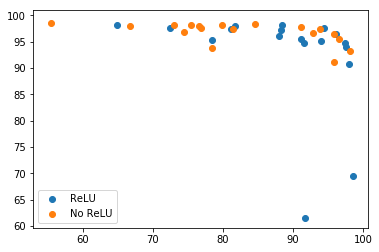

In [146]:

    
f = n_exp.query('act == \'a\'')
plt.scatter(f['sp'], f['acc'], label = "ReLU")
f= n_exp.query('act == \'n\'')
plt.scatter(f['sp'], f['acc'], label = "No ReLU")
plt.legend()

In [10]:
res['prune_test']

98.49

### Layer Unified

In [135]:
taus = [1e-5, 2e-5, 4e-5, 6e-5, 8e-5, 10e-5]
test_accs = [98.44, 97.49, 97.02, 96.63, 96.21, 95.57]
prune_accs = [98.42, 96.05, 96.26, 96.06, 95.72, 95.18]
spars = [52.50, 72.49, 97.51, 97.86, 98.07, 98.04]

In [136]:
res2 = [(1.5e-05, 98.17, 97.75, 55.48329019916732), (2e-05, 96.13, 93.56, 98.8785116837328), (2.5e-05, 96.66, 96.28, 64.68099471137617), (3e-05, 96.47, 95.77, 98.43816811072354), (3.5e-05, 96.09, 95.46, 98.5488166235325)]# (5e-05, 95.31, 93.85, 65.61006713926709)]

In [138]:
res_df = pd.DataFrame(columns = ["tau", "test_acc", "prune_acc", "sp"])
idx=0
for t, ta, pa, sp in zip(taus, test_accs, prune_accs, spars):
    res_df.loc[idx] =([t, ta, pa, sp])
    idx+=1
for r in res2:
    res_df.loc[idx] =r
    idx+=1

In [143]:
res_df.to_csv("layer_uni.csv")

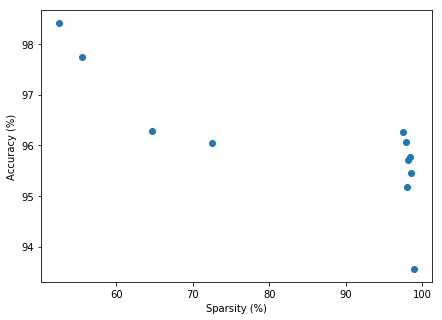

In [161]:
plt.figure(figsize=(7,5))
plt.scatter(res_df['sp'], res_df['prune_acc'])

plt.xlabel("Sparsity (%)")
plt.ylabel("Accuracy (%)")
plt.savefig('figs/swslayerres.eps', format='eps', dpi=1000, bbox_inches='tight')

In [134]:
res_df.query('sp < 70 and prune_acc < 94')

,tau,test_acc,prune_acc,sp
11,0.00005,95.31,93.85,65.610067


### Layer Unified

In [172]:
res.keys()

dict_keys(['init_weights', 'final_weights', 'data_size', 'epochs', 'train_acc', 'test_acc', 'val_acc', 'train_loss', 'test_loss', 'val_loss', 'complexity_loss', 'gmp_stddev', 'gmp_means', 'gmp_mixprop', 'scale', 'mean', 'var', 'zmean', 'zvar', 'tau', 'temp', 'mixtures', 'prune_acc', 'prune_weights', 'sparsity', 'test_prune_acc', 'test_prune_sp'])

In [174]:
ldf

,model,tauprune_acc,sp


In [178]:
from utils_write import loadfile, stack_weights, cr_calc
#mnist_retrain_model_SWSModel_m100_zm2000_r50_t8e-05_m16_kdT1_f_full
#mnist_retrain_gmp_SWSModel_m100_zm2000_r50_t4e-05_m16_kdT1_f_full
#mnist_retrain_model_LeNet_300_100_m100_zm2000_r50_t3e-05_m16_kdT1_f_full

ldf = pd.DataFrame(columns = ["model", "tau", "prune_acc", "sp"])
idx=0
tau_list = [1.5e-5, 2e-5, 2.5e-5, 3e-5, 3.5e-5, 4e-5, 6e-5, 8e-5, 10e-5]
for tau in tau_list:
    res = loadfile(100, 0.1, 2000,0.1,  tau, temp = 1, mixtures = 16, model = "LeNet_300_100", data_size = "full", model_save_dir = "../layer_sep/files")
    ldf.loc[idx] = (["LeNet", tau, res["test_prune_acc"][-1], res["sparsity"]])
    idx+=1

tau_list = [4e-6, 8e-6, 1e-5, 2e-5, 4e-5, 8e-5, 10e-5]
for tau in tau_list:
    res = loadfile(100, 0.1, 2000,0.1,  tau, temp = 1, mixtures = 16, model = "SWSModel", data_size = "full", model_save_dir = "../layer_sep/files")
    ldf.loc[idx] = (["SWSModel", tau, res["test_prune_acc"][-1], res["sparsity"]])
    idx+=1

In [179]:
ldf

,model,tau,prune_acc,sp
0,LeNet,0.000015,97.60,55.430029
1,LeNet,0.000020,93.45,98.876261
2,LeNet,0.000025,95.97,64.866284
3,LeNet,0.000030,95.73,98.437043
4,LeNet,0.000035,95.38,98.542440
5,LeNet,0.000040,95.00,71.736994
6,LeNet,0.000060,93.10,67.045872
7,LeNet,0.000080,91.60,82.461273
8,LeNet,0.000100,88.50,99.154945
9,SWSModel,0.000004,98.65,50.020857
